# Data Preparation and Feature Selection: car dataset

In [108]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

In [84]:
df = pd.read_csv("data/cars.csv")
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


## Prepare dataset

### Remove the duplicates from the dataset

In [85]:
df.drop_duplicates(inplace=True)

### Remove missing values

In [86]:
df.isnull().sum() / df.count()

aspiration        0.000000
enginelocation    0.055249
carwidth          0.010582
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

carwidth

In [87]:
df['carwidth'] = df['carwidth'].replace('*', np.nan)
df['carwidth'] = pd.to_numeric(df['carwidth'])

imputer = SimpleImputer(strategy="median")

imputer.fit(df[['carwidth']])
df['carwidth'] = imputer.transform(df[['carwidth']])

enginelocation

In [88]:
df[['enginelocation']].value_counts()
df.loc[df['enginelocation'].isnull(), 'enginelocation'] = 'front'

### Scaling

peakrpm , carwidth and stroke

/home/soutobias/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'carwidth'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

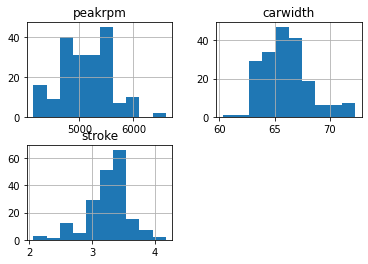

In [89]:
df[['peakrpm' , 'carwidth' , 'stroke']].hist()

In [90]:
r_scaler = RobustScaler()
r_scaler.fit(df[['peakrpm' , 'carwidth' , 'stroke']])

df['peakrpm'], df['carwidth'], df['stroke'] = r_scaler.transform(df[['peakrpm' , 'carwidth' , 'stroke']]).T
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


curbweight

array([[<AxesSubplot:title={'center':'curbweight'}>]], dtype=object)

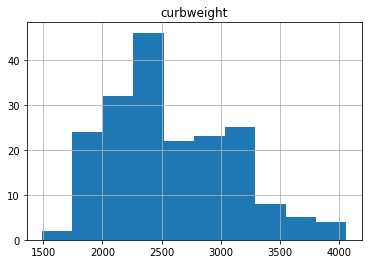

In [91]:
df[['curbweight']].hist()

<AxesSubplot:>

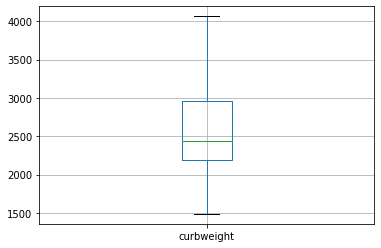

In [92]:
df[['curbweight']].boxplot()

In [93]:
r_scaler = StandardScaler()
r_scaler.fit(df[['curbweight']])

df['curbweight'] = r_scaler.transform(df[['curbweight']])
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### Encoding

aspiration and enginelocation

In [94]:
ohe = LabelEncoder()

ohe.fit(df[['aspiration']])
df['aspiration'] = ohe.transform(df[['aspiration']])

ohe.fit(df[['enginelocation']])
df['enginelocation'] = ohe.transform(df[['enginelocation']])

df.head()

/home/soutobias/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/soutobias/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0,0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0,0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0,0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0,0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0,0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


enginetype

In [95]:
df.enginetype.unique()  # Check unique values for streets (3)

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [96]:
ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(df[['enginetype']]) # Fit encoder

encoded = ohe.transform(df[['enginetype']])

df['dohc'], df['ohcv'], df['ohc'],df['l'], df['rotor'], df['ohcf'], df['dohcv'] = encoded.T

df.drop(columns='enginetype', inplace=True)
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,ohcv,ohc,l,rotor,ohcf,dohcv
0,0,0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0,0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


cylindernumber

In [97]:
df.cylindernumber.unique()
df['cylindernumber'] = df['cylindernumber'].map({'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8})

price

In [98]:
ohe = LabelEncoder()
ohe.fit(df[['price']])

df['price'] = ohe.transform(df[['price']])

/home/soutobias/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/soutobias/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Feature Selection

### Collinearity

<AxesSubplot:>

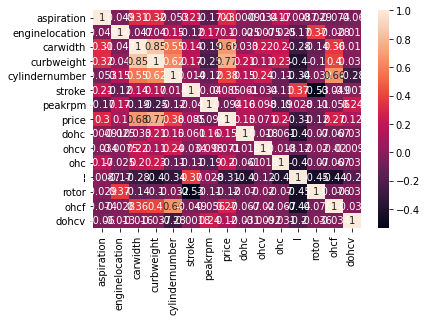

In [99]:
sns.heatmap(df.corr(), annot=True)

In [100]:
X = df.drop(columns='price')
y = df['price']

Base Model Linear Regression

In [101]:
model = LinearRegression()

cv_results = cross_validate(model, X, y, cv=5)
cv_results['test_score'].mean()

0.2303286097062541

Permutation Importance Linear regression

In [102]:
log_model = LinearRegression().fit(X, y) # Fit model
permutation_score = permutation_importance(log_model, X, y, n_repeats=30) # Perform Permutation
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
3,curbweight,1.154637
4,cylindernumber,0.058696
11,rotor,0.046606
5,stroke,0.040791
1,enginelocation,0.040393
2,carwidth,0.031264
13,dohcv,0.017456
0,aspiration,0.008198
9,ohc,0.005378
12,ohcf,0.000979


Test with new features

In [103]:
X = df.drop(columns=['price', 'l', 'ohc', 'ohcv', 'ohcf', 'peakrpm', 'dohc', 'aspiration'])
y = df['price']

In [80]:
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5)
cv_results['test_score'].mean()

0.38932397724631357

In [104]:
df.drop(columns=['l', 'ohc', 'ohcv', 'ohcf', 'peakrpm', 'dohc', 'aspiration'], inplace=True)

Base Modelling Logistic Regression

In [107]:
X = df.drop(columns=['price'])
y = df['price']

In [109]:
model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv=5)
cv_results['test_score'].mean()

0.8692307692307691

Permitation importance logistic regression

In [110]:
log_model = LogisticRegression().fit(X, y) # Fit model
permutation_score = permutation_importance(log_model, X, y, n_repeats=30) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
2,curbweight,0.276963
1,carwidth,0.075044
6,dohcv,0.016230
5,rotor,0.010995
4,stroke,0.010122
3,cylindernumber,0.000873
0,enginelocation,0.000175


Final results

In [111]:
X = df.drop(columns=['price', 'enginelocation', 'cylindernumber', 'stroke'])
y = df['price']

In [112]:
model = LogisticRegression() # Fit model
cv_results = cross_validate(model, X, y, cv=5)
cv_results['test_score'].mean()

0.9006747638326585